In [46]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import copy
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
df = pd.read_pickle('../gans_input_data/2_merged_filtered_logRPKM_dataset.pkl').sample(frac=1)

In [19]:
pheno = df['cell_type'].values.reshape((len(pheno),1))
pheno.shape

(3067, 1)

In [48]:
data = df.drop(['cell_type', 'disease_condition', 'dataset'], axis=1)
meta = df[['cell_type', 'disease_condition', 'dataset']]

In [58]:
data.to_csv('data', columns=None, header=True, index=True, index_label=None)

In [52]:
store = pd.HDFStore('test.h5')
out = store.put(key="/rpkm", value=data.values)

ImportError: HDFStore requires PyTables, "No module named 'tables'" problem importing

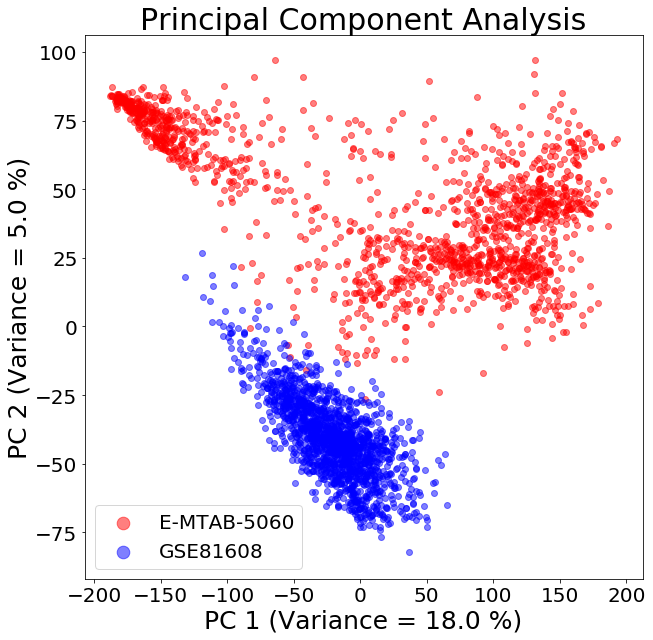

In [50]:
pca = PCA(n_components=50)
components = pca.fit_transform(data.values)
pd.DataFrame(components[:, 0:2]).to_csv("../x_pca", header=None, index=False, columns=None, index_label=None)
pd.DataFrame(meta["cell_type"].values).to_csv("../_pca", header=None, index=False, columns=None, index_label=None)

var_ratio = [round(i, 2) for i in pca.explained_variance_ratio_]

fig = plt.figure(figsize=(10,10))
colors = ['Red', 'Blue']
plt.scatter(components[np.where(meta["dataset"].values==1)[0], 0], components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta["dataset"].values==2)[0], 0], components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)

plt.xlabel('PC 1 (Variance = %s %%)' % (var_ratio[0] * 100), fontsize=25)
plt.ylabel('PC 2 (Variance = %s %%)' % (var_ratio[1] * 100), fontsize=25)
plt.title("Principal Component Analysis", fontsize=30)
lgnd = plt.legend(('E-MTAB-5060', 'GSE81608'), loc=3, prop={'size': 20})

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [160]
lgnd.legendHandles[1]._sizes = [160]

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.show()


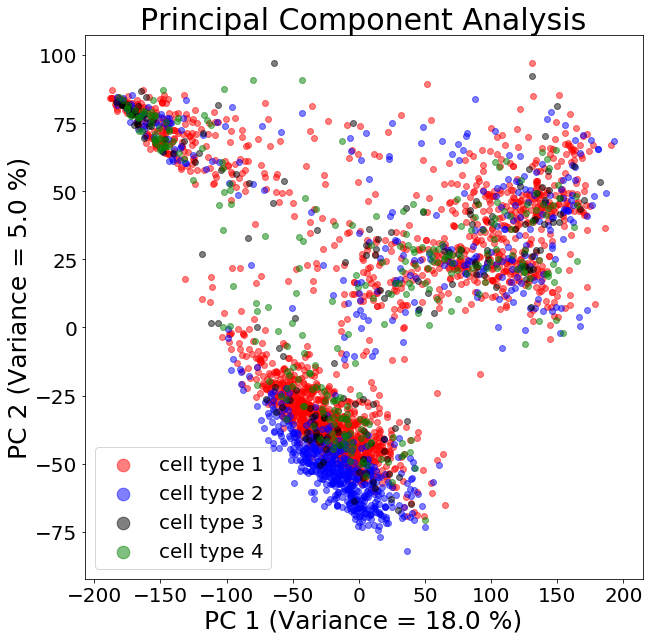

In [29]:
fig = plt.figure(figsize=(10,10))
plt.scatter(components[np.where(meta["cell_type"].values==0.0)[0], 0], components[np.where(meta["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta["cell_type"].values==1.0)[0], 0], components[np.where(meta["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(components[np.where(meta["cell_type"].values==2.0)[0], 0], components[np.where(meta["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(components[np.where(meta["cell_type"].values==3.0)[0], 0], components[np.where(meta["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('PC 1 (Variance = %s %%)' % (var_ratio[0] * 100), fontsize=25)
plt.ylabel('PC 2 (Variance = %s %%)' % (var_ratio[1] * 100), fontsize=25)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))

plt.title("Principal Component Analysis", fontsize=30)
lgnd = plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'), loc=3, prop={'size': 20})

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [160]
lgnd.legendHandles[1]._sizes = [160]
lgnd.legendHandles[2]._sizes = [160]
lgnd.legendHandles[3]._sizes = [160]

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.show()

## t-sne

In [25]:
# tsne with 2 comps on the reduced data
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=1000)
tsne_components = tsne.fit_transform(components)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 3067 samples in 0.004s...
[t-SNE] Computed neighbors for 3067 samples in 0.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3067
[t-SNE] Computed conditional probabilities for sample 2000 / 3067
[t-SNE] Computed conditional probabilities for sample 3000 / 3067
[t-SNE] Computed conditional probabilities for sample 3067 / 3067
[t-SNE] Mean sigma: 14.936255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.280640
[t-SNE] Error after 1000 iterations: 0.891637


In [30]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 45,
 'random_state': None,
 'verbose': 1}

In [31]:
tsne_components.shape

(3067, 2)

In [32]:
pheno.shape

(3067, 1)

In [33]:
tsne_pca = np.concatenate([tsne_components, pheno], axis=1)

In [34]:
pd.DataFrame(tsne_pca).to_csv("tsne_pca_with_pheno.csv", 
                               columns=None, 
                               header=False, 
                               index=False, 
                               index_label=None,
                               encoding="utf8")

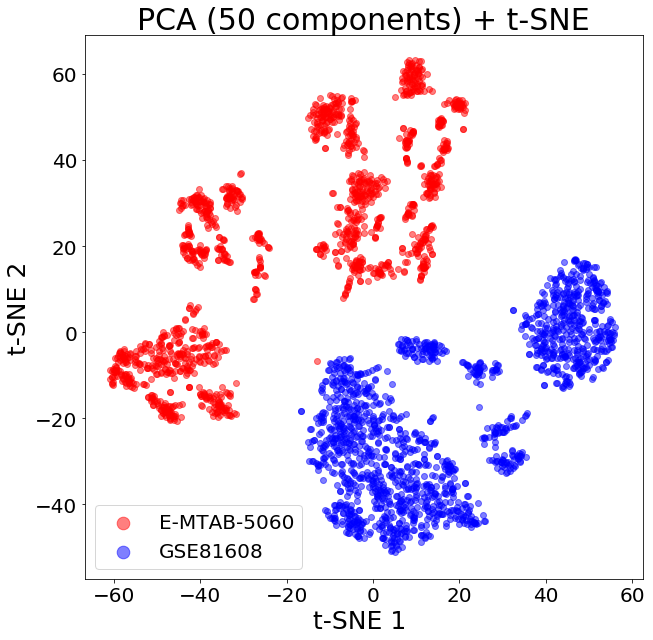

In [37]:
# plot comps vs. dataset
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["dataset"].values==1)[0], 0], tsne_components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["dataset"].values==2)[0], 0], tsne_components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)

plt.xlabel('t-SNE 1 ', fontsize=25)
plt.ylabel('t-SNE 2', fontsize=25)
plt.title("PCA (50 components) + t-SNE", fontsize=30)
lgnd = plt.legend(('E-MTAB-5060', 'GSE81608'), loc=3, prop={'size': 20})

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [160]
lgnd.legendHandles[1]._sizes = [160]

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.show()

# drop pc-1

In [59]:
# tsne with 2 comps on the reduced data, dropping pc-1
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_components = tsne.fit_transform(components[:, 1:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3067 samples in 0.005s...
[t-SNE] Computed neighbors for 3067 samples in 0.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3067
[t-SNE] Computed conditional probabilities for sample 2000 / 3067
[t-SNE] Computed conditional probabilities for sample 3000 / 3067
[t-SNE] Computed conditional probabilities for sample 3067 / 3067
[t-SNE] Mean sigma: 13.924398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.074387
[t-SNE] Error after 1000 iterations: 0.922153


## plot by dataset

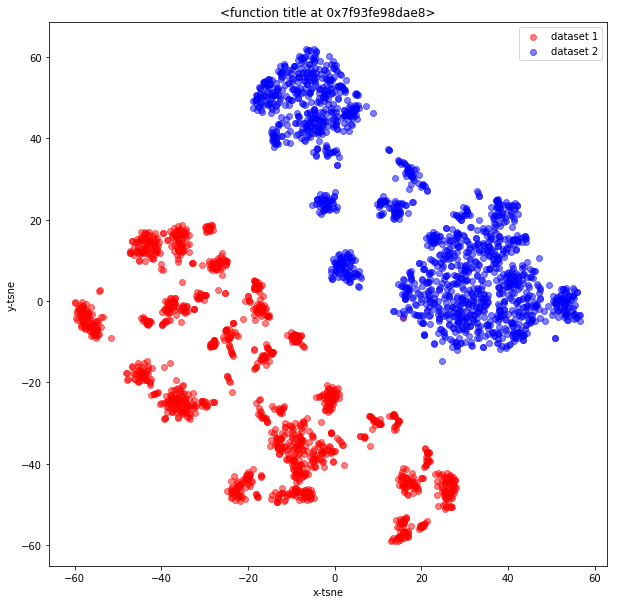

In [60]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["dataset"].values==1)[0], 0], tsne_components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["dataset"].values==2)[0], 0], tsne_components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('dataset 1', 'dataset 2'))
plt.show()

## plot by cell type

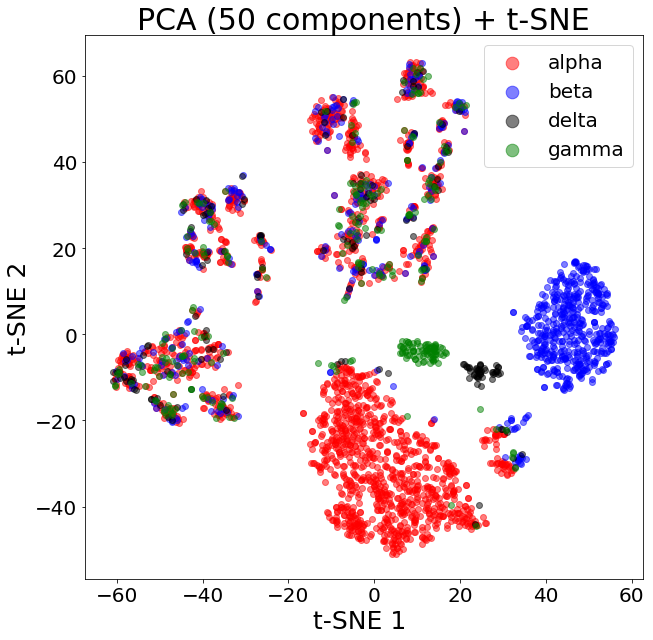

In [45]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["cell_type"].values==0.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==1.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==2.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==3.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('t-SNE 1 ', fontsize=25)
plt.ylabel('t-SNE 2', fontsize=25)
plt.title("PCA (50 components) + t-SNE", fontsize=30)
lgnd = plt.legend(('alpha', 'beta', 'delta', 'gamma'),loc=1, prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
lgnd.legendHandles[0]._sizes = [160]
lgnd.legendHandles[1]._sizes = [160]
lgnd.legendHandles[2]._sizes = [160]
lgnd.legendHandles[3]._sizes = [160]
plt.show()

# drop pc-1, pc-2

In [104]:
# tsne with 2 comps on the reduced data, dropping pc-1
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_components = tsne.fit_transform(components[:, 2:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3067 samples in 0.004s...
[t-SNE] Computed neighbors for 3067 samples in 0.722s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3067
[t-SNE] Computed conditional probabilities for sample 2000 / 3067
[t-SNE] Computed conditional probabilities for sample 3000 / 3067
[t-SNE] Computed conditional probabilities for sample 3067 / 3067
[t-SNE] Mean sigma: 14.625803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.625809
[t-SNE] Error after 1000 iterations: 0.936713


## plot by dataset

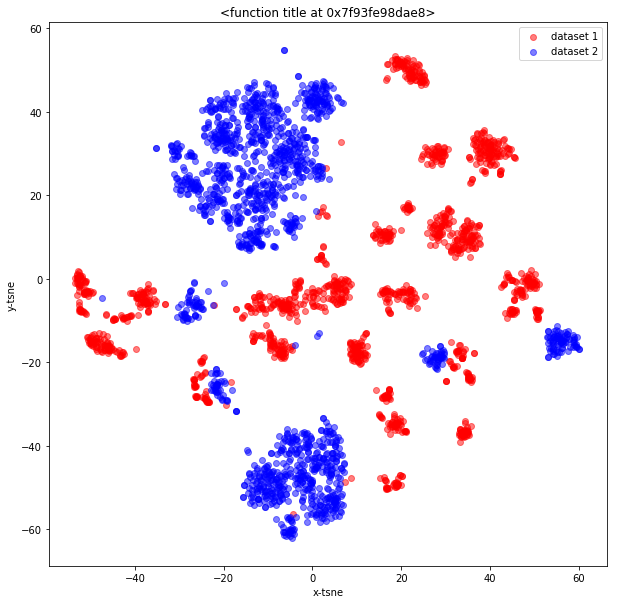

In [105]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["dataset"].values==1)[0], 0], tsne_components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["dataset"].values==2)[0], 0], tsne_components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('dataset 1', 'dataset 2'))
plt.show()

## plot by cell type

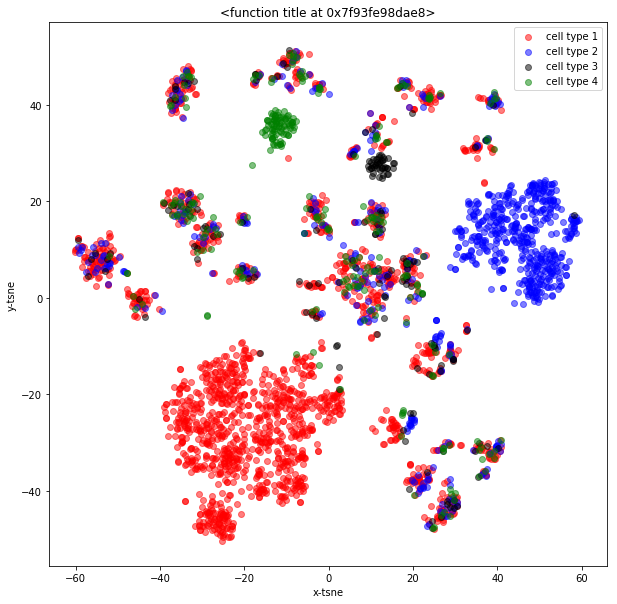

In [64]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["cell_type"].values==0.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==1.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==2.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==3.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))
plt.show()

# drop pc-1, pc-2, pc-3 

In [67]:
# tsne with 2 comps on the reduced data, dropping pc-1
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_components = tsne.fit_transform(components[:, 3:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3067 samples in 0.004s...
[t-SNE] Computed neighbors for 3067 samples in 0.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3067
[t-SNE] Computed conditional probabilities for sample 2000 / 3067
[t-SNE] Computed conditional probabilities for sample 3000 / 3067
[t-SNE] Computed conditional probabilities for sample 3067 / 3067
[t-SNE] Mean sigma: 12.677032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.473534
[t-SNE] Error after 1000 iterations: 1.131186


## plot by dataset

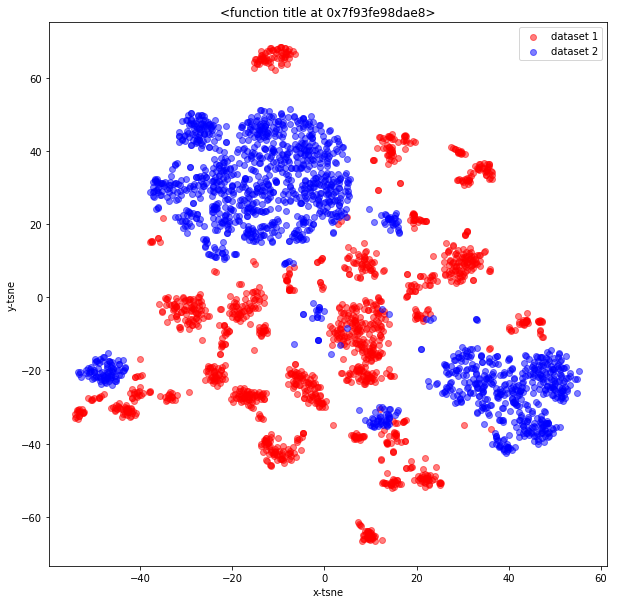

In [68]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["dataset"].values==1)[0], 0], tsne_components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["dataset"].values==2)[0], 0], tsne_components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('dataset 1', 'dataset 2'))
plt.show()

## plot by cell type

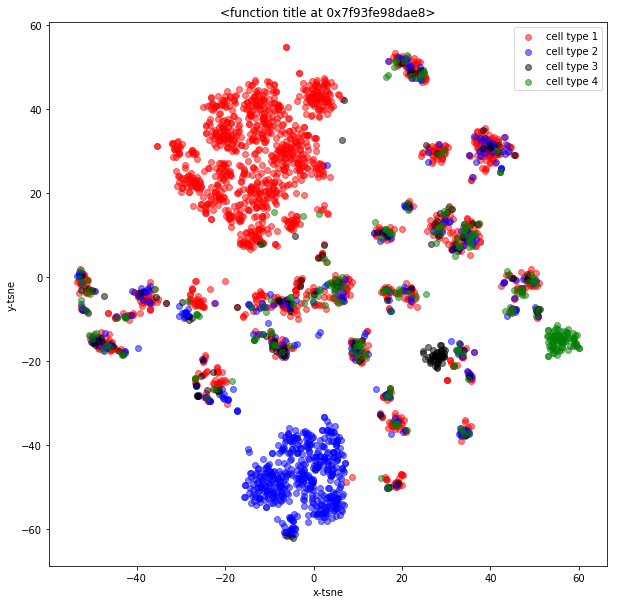

In [106]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["cell_type"].values==0.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==1.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==2.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==3.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))
plt.show()

# drop pc-1, pc-2, pc-3, pc-4

In [70]:
# tsne with 2 comps on the reduced data, dropping pc-1
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_components = tsne.fit_transform(components[:, 4:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3067 samples in 0.004s...
[t-SNE] Computed neighbors for 3067 samples in 0.756s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3067
[t-SNE] Computed conditional probabilities for sample 2000 / 3067
[t-SNE] Computed conditional probabilities for sample 3000 / 3067
[t-SNE] Computed conditional probabilities for sample 3067 / 3067
[t-SNE] Mean sigma: 12.534763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.914085
[t-SNE] Error after 1000 iterations: 1.396032


## plot by dataset

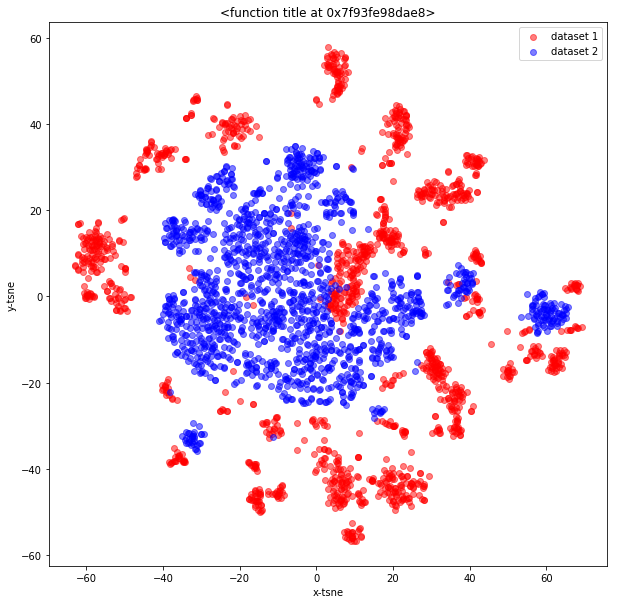

In [71]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["dataset"].values==1)[0], 0], tsne_components[np.where(meta["dataset"].values==1)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["dataset"].values==2)[0], 0], tsne_components[np.where(meta["dataset"].values==2)[0], 1], c="blue", alpha=0.5)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('dataset 1', 'dataset 2'))
plt.show()

## plot by cell type

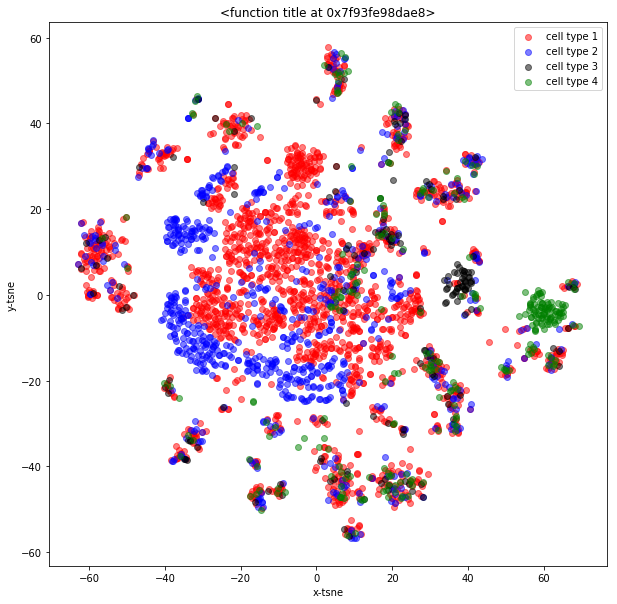

In [72]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_components[np.where(meta["cell_type"].values==0.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==1.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==2.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(tsne_components[np.where(meta["cell_type"].values==3.0)[0], 0], tsne_components[np.where(meta["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))
plt.show()

In [84]:
meta_sub.shape

(1467, 3)

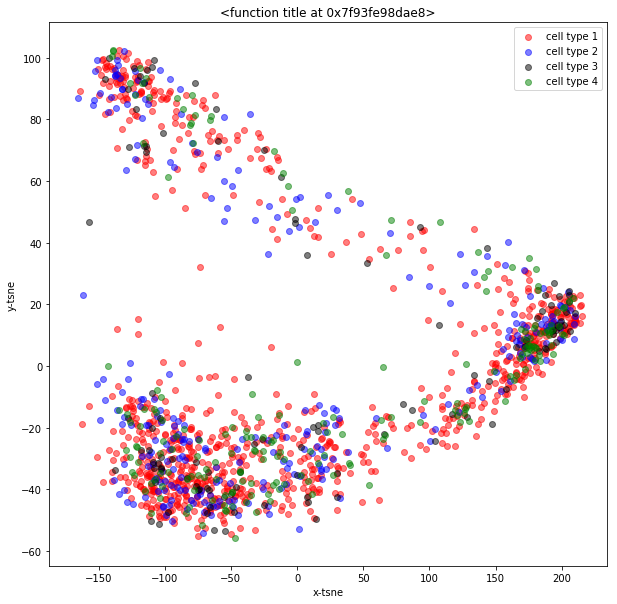

In [85]:
pca = PCA(n_components=50)
components = pca.fit_transform(data.values[np.where(meta["dataset"].values==1)[0], :])
var_ratio = [round(i, 2) for i in pca.explained_variance_ratio_]
meta_sub = meta.iloc[np.where(meta["dataset"].values==1)[0], :]

# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(components[np.where(meta_sub["cell_type"].values==0.0)[0], 0], components[np.where(meta_sub["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==1.0)[0], 0], components[np.where(meta_sub["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==2.0)[0], 0], components[np.where(meta_sub["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==3.0)[0], 0], components[np.where(meta_sub["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))
plt.show()

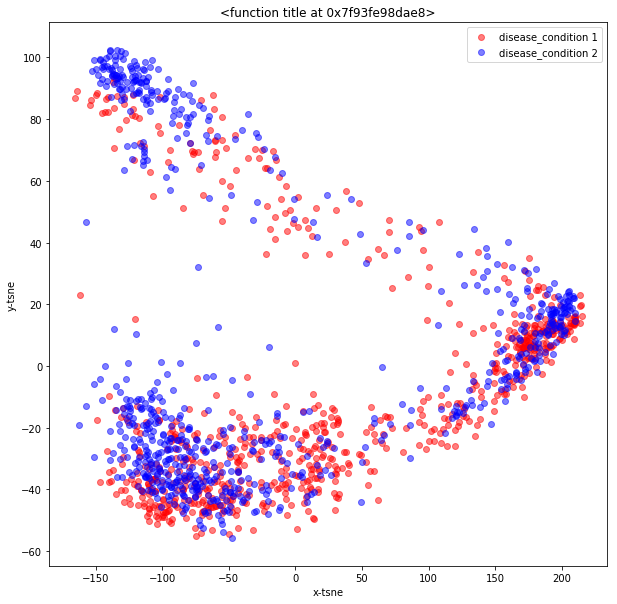

In [90]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(components[np.where(meta_sub["disease_condition"].values==0.0)[0], 0], components[np.where(meta_sub["disease_condition"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta_sub["disease_condition"].values==1.0)[0], 0], components[np.where(meta_sub["disease_condition"].values==1.0)[0], 1], c="blue", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('disease_condition 1', 'disease_condition 2'))
plt.show()

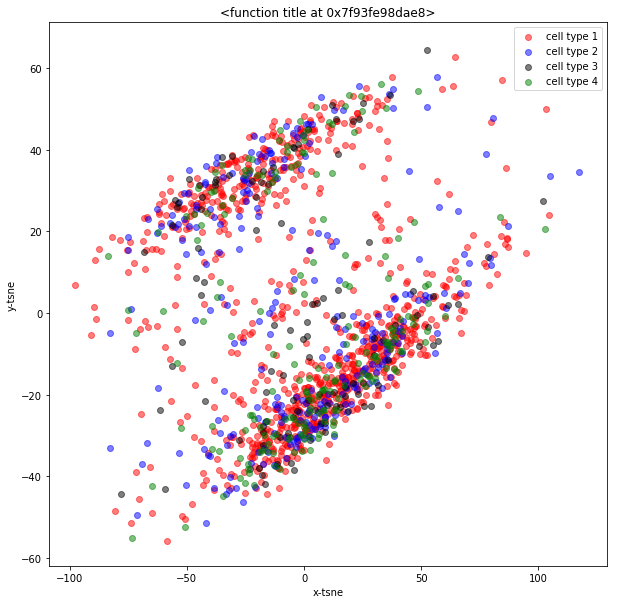

In [92]:
pca = PCA(n_components=50)
components = pca.fit_transform(data.values[np.where(meta["dataset"].values==2)[0], :])
var_ratio = [round(i, 2) for i in pca.explained_variance_ratio_]
meta_sub = meta.iloc[np.where(meta["dataset"].values==1)[0], :]

# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(components[np.where(meta_sub["cell_type"].values==0.0)[0], 0], components[np.where(meta_sub["cell_type"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==1.0)[0], 0], components[np.where(meta_sub["cell_type"].values==1.0)[0], 1], c="blue", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==2.0)[0], 0], components[np.where(meta_sub["cell_type"].values==2.0)[0], 1], c="black", alpha=0.5)
plt.scatter(components[np.where(meta_sub["cell_type"].values==3.0)[0], 0], components[np.where(meta_sub["cell_type"].values==3.0)[0], 1], c="green", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('cell type 1', 'cell type 2', 'cell type 3', 'cell type 4'))
plt.show()

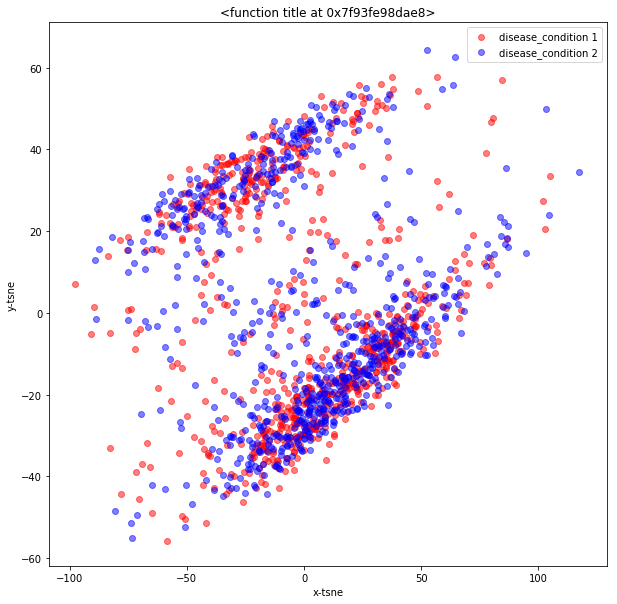

In [93]:
# plot comps vs. cell type
fig = plt.figure(figsize=(10,10))
plt.scatter(components[np.where(meta_sub["disease_condition"].values==0.0)[0], 0], components[np.where(meta_sub["disease_condition"].values==0.0)[0], 1], c="red", alpha=0.5)
plt.scatter(components[np.where(meta_sub["disease_condition"].values==1.0)[0], 0], components[np.where(meta_sub["disease_condition"].values==1.0)[0], 1], c="blue", alpha=0.5)

plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title(title)
plt.legend(('disease_condition 1', 'disease_condition 2'))
plt.show()

In [94]:
var_ratio

[0.04,
 0.02,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]